In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
import os 
from PIL import Image

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

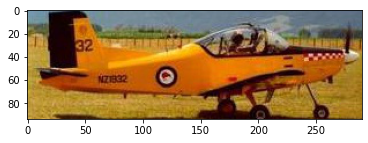

In [4]:
img = plt.imread("C:\\Users\\HP\\Documents\\natural_images\\airplane\\airplane_0002.jpg")
plt.imshow(img)

In [5]:
dataset_dir = 'C:\\Users\\HP\\Documents\\natural_images'

# Initialize empty lists for images and labels
images = []
labels = []

# Loop through subdirectories (each representing a class)
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = Image.open(image_path).convert('RGB')  # Convert to RGB if needed
        image = image.resize((32,32))  # Resize to desired dimensions
        image_array = np.array(image)
        
        images.append(image_array)
        labels.append(class_name)

images = np.array(images)
labels = np.array(labels) 

In [6]:
class_names = ['airplane','person','car','cat','dog','flower','fruit','motorbike']


In [7]:
from tensorflow.keras.utils import to_categorical


class_to_label = {class_name: label for label, class_name in enumerate(class_names)}

# Convert labels to integer format
integer_labels = [class_to_label[label] for label in labels]

# Convert integer labels to one-hot encoded format
num_classes = len(class_names)
one_hot_labels = to_categorical(integer_labels, num_classes)

# Verify shapes and content
print("Original labels:", labels)
print("Integer labels:", integer_labels)

Original labels: ['airplane' 'airplane' 'airplane' ... 'person' 'person' 'person']
Integer labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
images = images /255.0

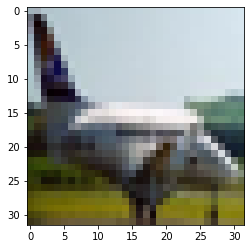

In [9]:
IMG_INDEX = 10

plt.imshow(images[IMG_INDEX], cmap=plt.cm.binary)
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(8, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0

In [13]:
from sklearn.model_selection import train_test_split 
train_images, temp_images = train_test_split(images, test_size=0.3, random_state=32)
test_images, val_images = train_test_split(temp_images, test_size=0.5, random_state=32 )


In [14]:
train_labels ,temp_labels  = train_test_split(one_hot_labels, test_size=0.3, random_state=32 )
test_labels, val_labels = train_test_split(temp_labels, test_size=0.5, random_state=32 )

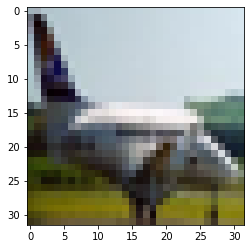

In [15]:
IMG_INDEX = 10

plt.imshow(images[IMG_INDEX], cmap=plt.cm.binary)
plt.show()

In [16]:
#Compiling the model
model.compile(optimizer='adam',
             loss=tf.keras.losses.categorical_crossentropy,
             metrics = ['accuracy'])

In [17]:
#Training the model
hist = model.fit(train_images,train_labels, epochs= 10, validation_data=(val_images, val_labels))

Epoch 1/10
151/151 [==============================] - 28s 146ms/step - loss: 1.4717 - accuracy: 0.4632 - val_loss: 0.9808 - val_accuracy: 0.6570
Epoch 2/10
151/151 [==============================] - 22s 145ms/step - loss: 0.8560 - accuracy: 0.6912 - val_loss: 0.6838 - val_accuracy: 0.7478
Epoch 3/10
151/151 [==============================] - 21s 139ms/step - loss: 0.6538 - accuracy: 0.7596 - val_loss: 0.6045 - val_accuracy: 0.7845
Epoch 4/10
151/151 [==============================] - 21s 140ms/step - loss: 0.5399 - accuracy: 0.8055 - val_loss: 0.4972 - val_accuracy: 0.8261
Epoch 5/10
151/151 [==============================] - 21s 141ms/step - loss: 0.4462 - accuracy: 0.8370 - val_loss: 0.4428 - val_accuracy: 0.8338
Epoch 6/10
151/151 [==============================] - 20s 135ms/step - loss: 0.4296 - accuracy: 0.8428 - val_loss: 0.4383 - val_accuracy: 0.8319
Epoch 7/10
151/151 [==============================] - 17s 114ms/step - loss: 0.3703 - accuracy: 0.8633 - val_loss: 0.4481 - val_ac

In [18]:
#Evaluating the model
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)

33/33 - 2s - loss: 0.3850 - accuracy: 0.8570 - 2s/epoch - 55ms/step


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [20]:
validation_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    
)
# Create the validation generator
validation_generator = validation_datagen.flow_from_directory(
    dataset_dir,  # Path to validation data directory
    target_size=(32, 32),  # Resize images to this size
    batch_size=32,
    class_mode='categorical',  # If your labels are one-hot encoded
    shuffle=False  # Do not shuffle validation data
)

Found 6899 images belonging to 8 classes.


1/1 [==============================] - 1s 771ms/step


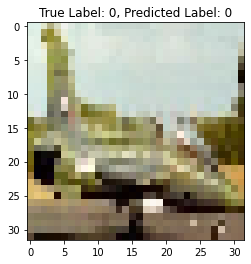

In [21]:
sample_image, sample_label = next(iter(validation_generator))

# Make predictions using the trained model
predictions = model.predict(sample_image)

# Decode the one-hot encoded label
decoded_label = np.argmax(sample_label, axis=1)[0]

# Get the predicted label index
predicted_label = np.argmax(predictions[0])

# Display the image and its predicted label
plt.imshow(sample_image[0])
plt.title(f"True Label: {decoded_label}, Predicted Label: {predicted_label}")
plt.show()


In [27]:
model.save('C:\\Users\\HP\\Documents')

# Save only the model architecture (without weights and optimizer state)
model_architecture = model.to_json()
with open('C:\\Users\\HP\\Documents\\.ipynb_checkpoints.json', 'w') as json_file:
    json_file.write(model_architecture)

INFO:tensorflow:Assets written to: C:\Users\HP\Documents\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Documents\assets
